# Pytorch basis

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


### 데이터 정의

In [2]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

### 데이터 확인

In [3]:
x_train.shape

(15, 1)

In [4]:
y_train.shape

(15, 1)

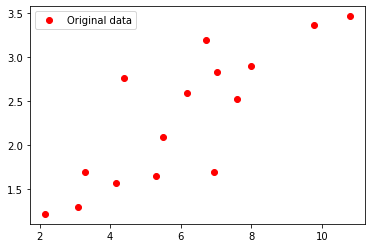

In [5]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.legend()
plt.show()

### 파라미터 설정

In [7]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

### Linear regression 모델 정의

torch.nn.Linear 클래스 사용

$y=x*w+b$

https://pytorch.org/docs/master/nn.html?highlight=linear#torch.nn.Linear

In [8]:
# Linear regression model
model = nn.Linear(input_size, output_size)

### SGD와 MSE Loss 정의


https://pytorch.org/docs/master/generated/torch.nn.MSELoss.html#torch.nn.MSELoss

https://pytorch.org/docs/master/optim.html?highlight=optim%20sgd#torch.optim.SGD

In [9]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

### 모델 학습

In [10]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 13.5122
Epoch [10/60], Loss: 5.6712
Epoch [15/60], Loss: 2.4944
Epoch [20/60], Loss: 1.2072
Epoch [25/60], Loss: 0.6854
Epoch [30/60], Loss: 0.4738
Epoch [35/60], Loss: 0.3879
Epoch [40/60], Loss: 0.3528
Epoch [45/60], Loss: 0.3384
Epoch [50/60], Loss: 0.3323
Epoch [55/60], Loss: 0.3295
Epoch [60/60], Loss: 0.3282


#### Prediction

In [11]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()

In [12]:
predicted

array([[1.0154135],
       [1.4714744],
       [1.9275353],
       [2.4292023],
       [2.5204144],
       [1.375287 ],
       [3.701612 ],
       [2.210293 ],
       [2.794051 ],
       [0.5456709],
       [2.5668495],
       [4.121188 ],
       [1.8500049],
       [2.9627934],
       [0.9324934]], dtype=float32)

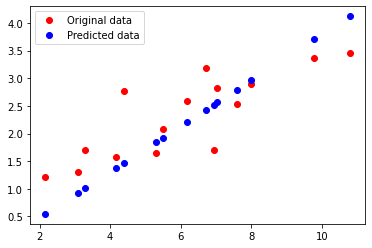

In [13]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, 'bo', label='Predicted data')
plt.legend()
plt.show()